In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv(r"E:\Python basics\Pranjal Sir\9. Skillenza Hackethon\Level II\employee_train.csv")

In [43]:
df.shape

(1048, 28)

In [44]:
df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [46]:
df.columns = df.columns.str.lower()

In [47]:
(df.isna().sum()/df.shape[0])*100

s.no                          0.000000
timestamp                     0.000000
age                           0.000000
gender                        0.000000
country                       0.000000
state                        39.312977
self_employed                 1.717557
family_history                0.000000
treatment                     0.000000
work_interfere               22.519084
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      1.240458
care_options                  0.000000
wellness_program              0.381679
seek_help                     0.000000
anonymity                     0.000000
leave                         0.381679
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical       

In [48]:
# Drop Comments - It contain 87% of null values

In [49]:
(df.country.value_counts()/df.shape[0])*100

United States             61.450382
United Kingdom            14.599237
Canada                     6.106870
Germany                    3.530534
Netherlands                1.717557
Australia                  1.717557
Ireland                    1.240458
France                     1.049618
India                      0.763359
New Zealand                0.572519
Italy                      0.572519
Sweden                     0.572519
Switzerland                0.572519
Brazil                     0.477099
Poland                     0.477099
Israel                     0.381679
South Africa               0.381679
Belgium                    0.381679
Bulgaria                   0.286260
Mexico                     0.286260
Russia                     0.286260
Austria                    0.286260
Portugal                   0.190840
Denmark                    0.190840
Finland                    0.190840
Singapore                  0.190840
Hungary                    0.095420
Croatia                    0

In [50]:
df.treatment.replace({'Yes':1,'No':0},inplace=True)

In [51]:
# analysis on country having no of treatments done
pd.crosstab(df.country,df.treatment)

treatment,0,1
country,,
Australia,8,10
Austria,3,0
"Bahamas, The",0,1
Belgium,3,1
Bosnia and Herzegovina,1,0
Brazil,4,1
Bulgaria,2,1
Canada,32,32
Colombia,1,0


In [52]:
# 61% of people are belonging to US. So, There is no use of keeping this variable too.
# Drop country and state

It is not that more people from US are suffering from mental health problems, the survey is taken up mostly by the us people. There are very few people who took part in survey from other countries, so it is often misleading to conclude people from certain region suffer more. So we will drop this column

In [54]:
df = df.drop(['country','state','timestamp','comments','s.no'], axis = 1)

In [56]:
df.describe(include='all')

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.048000e+03,1048,1030,1048,1048.000000,812,1048,1048,1048,1035,...,1048,1044,1048,1048,1048,1048,1048,1048,1048,1048
unique,NaN,45,2,2,NaN,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,NaN,Sometimes,25-Jun,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,518,906,643,NaN,386,245,733,870,400,...,685,462,424,773,651,439,835,461,471,902
mean,9.541988e+07,NaN,NaN,NaN,0.488550,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.089010e+09,NaN,NaN,NaN,0.500108,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- What is this???
- How can age will be in negative & live for 99999 yrs?
- So, He/She is the GOD, GOD doesn't requires treatment...

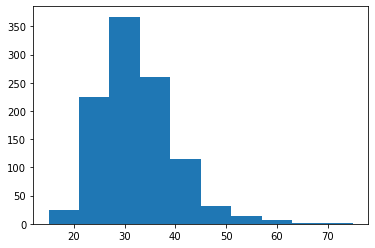

In [65]:
# below 15 yrs old the age is 15
df.loc[df.age<15,'age']=15
# above 75 yrs old the age is 75
df.loc[df.age>75,'age']=75

plt.hist(df.age);

In [57]:
df.gender.value_counts()

Male                        518
male                        162
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
Make                          4
Female                        2
Cis Male                      2
Woman                         2
Female (trans)                2
Man                           2
Male                          1
Agender                       1
cis-female/femme              1
Guy (-ish) ^_^                1
male leaning androgynous      1
A little about you            1
Mail                          1
Female (cis)                  1
msle                          1
Neuter                        1
Androgyne                     1
queer                         1
cis male                      1
Trans woman                   1
Nah                           1
Genderqueer                   1
fluid                         1
Enby    

-----*LOL*-----

In [59]:
df['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df['gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [60]:
df.gender.value_counts()

Male      827
Female    202
Other      19
Name: gender, dtype: int64

In [79]:
# Filling the null values 
df.self_employed = df.self_employed.fillna(df['self_employed'].mode().values[0])
df.work_interfere = df.work_interfere.fillna('Never')
df.benefits = df.benefits.fillna('Yes')
df.wellness_program = df.wellness_program.fillna('No')
df.leave = df.leave.fillna('Somewhat easy')

In [80]:
df.isnull().sum()

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [99]:
df.no_employees.unique()

array(['25-Jun', 'More than 1000', '26-100', '100-500', '5-Jan',
       '500-1000'], dtype=object)

In [100]:
df.no_employees.replace({'5-Jan':'1-5','25-Jun':'6-25'},inplace=True)

In [101]:
df.no_employees.value_counts()

6-25              245
26-100            238
More than 1000    227
100-500           150
1-5               133
500-1000           55
Name: no_employees, dtype: int64

In [117]:
df.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [130]:
# Sampling the data
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size=.2)
x_train = train.drop('treatment',axis=1)
y_train = train['treatment']
x_test  = test.drop('treatment',axis=1)
y_test  = test['treatment']

In [131]:
# Converting non-numeric to numeric by Order
gender_cols = ['Female','Male','Other']
self_employed_cols = ['No','Yes']
family_history_cols = ['No','Yes']
work_interfere_cols = ['Never','Rarely','Sometimes','Often']
no_employees_cols = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work_cols = ['No','Yes']
tech_company_cols = ['No','Yes']
benefits_cols = ['No','Don\'t know','Yes'] 
care_options_cols = ['No','Not sure','Yes']
wellness_program_cols  =['No','Don\'t know','Yes']
seek_help_cols = ['No','Don\'t know','Yes']
anonymity_cols = ['No','Don\'t know','Yes']
leave_cols = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence_cols = ['No','Maybe','Yes']
phys_health_consequence_cols = ['No','Maybe','Yes']
coworkers_col = ['No','Some of them','Yes']
supervisor_cols = ['No','Some of them','Yes']
mental_health_interview_cols = ['No','Maybe','Yes']
phys_health_interview_cols = ['No','Maybe','Yes']
mental_vs_physical_cols = ["Don't know",'No','Yes']
obs_consequence_cols = ['No','Yes']

columns_for_encoder = [gender_cols,self_employed_cols,family_history_cols,work_interfere_cols,no_employees_cols,remote_work_cols,
                            tech_company_cols,benefits_cols,care_options_cols,wellness_program_cols,seek_help_cols,anonymity_cols,leave_cols,
                            mental_health_consequence_cols,phys_health_consequence_cols,coworkers_col,supervisor_cols,mental_health_interview_cols,
                            phys_health_interview_cols,mental_vs_physical_cols,obs_consequence_cols]
from sklearn.preprocessing import OrdinalEncoder
ord_en = OrdinalEncoder(categories=list(columns_for_encoder))
features=list(x_train.columns)
x_train[features[1:]] = ord_en.fit_transform(x_train.iloc[:,1:])

In [133]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train[features] = std_scaler.fit_transform(x_train)

### Model Building

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score

In [139]:
model_names = []
acc = []
f1 = []

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
ada = AdaBoostClassifier(base_estimator=dt)
gb  = GradientBoostingClassifier()
xgb = XGBClassifier()

models = [logreg, dt,rf,knn,svc,ada,gb,xgb]

for model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_train)
    acc.append(accuracy_score(y_train, pred))
    f1.append(f1_score(y_train, pred))
    
    
model_names = ['logreg', 'dt','rf','knn','svc','ada','gb','xgb']
result = pd.DataFrame({'Accuracy':acc,'F1_Score':f1}, index=model_names)
result

,Accuracy,F1_Score
logreg,0.829356,0.833914
dt,1.000000,1.000000
rf,1.000000,1.000000
knn,0.822196,0.820265
svc,0.885442,0.892857
ada,1.000000,1.000000
gb,0.881862,0.888639
xgb,1.000000,1.000000


In [ ]:
    f1_val = cross_val_score(model,x_train,y_train,scoring='f1',cv=10)
'F1_val_score':f1_val.mean()

In [140]:
from sklearn.preprocessing import OrdinalEncoder
x_test[features[1:]] = ord_en.transform(x_test.iloc[:,1:])

In [141]:
x_test[features] = std_scaler.transform(x_test)

In [150]:
y_pred = svc.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Accuracy : 0.8333333333333334
F1 Score : 0.8186528497409326


In [151]:
model_names = []
acc = []
f1 = []

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
ada = AdaBoostClassifier(base_estimator=dt)
gb  = GradientBoostingClassifier()
xgb = XGBClassifier()

models = [logreg, dt,rf,knn,svc,ada,gb,xgb]

for model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    f1.append(f1_score(y_test, pred))
    
    
model_names = ['logreg', 'dt','rf','knn','svc','ada','gb','xgb']
result = pd.DataFrame({'Accuracy':acc,'F1_Score':f1}, index=model_names)
result

,Accuracy,F1_Score
logreg,0.814286,0.786885
dt,0.761905,0.728261
rf,0.814286,0.795812
knn,0.790476,0.744186
svc,0.833333,0.818653
ada,0.757143,0.724324
gb,0.814286,0.791444
xgb,0.814286,0.789189


In [155]:
from sklearn.svm import SVC
svc = SVC(C=0.5, gamma=0.01)
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

0.819047619047619
0.8


In [177]:
dt = pd.read_csv(r"E:\Python basics\Pranjal Sir\9. Skillenza Hackethon\Level II\employee_test.csv")

In [178]:
dt.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,...,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,...,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,...,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [179]:
dt.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        103
self_employed                  0
family_history                 0
work_interfere                28
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       3
care_options                   0
wellness_program               2
seek_help                      0
anonymity                      0
leave                          5
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     178
dtype: int64

In [180]:
dt1 = dt

In [181]:
dt1.columns = dt1.columns.str.lower()

In [182]:
dt1 = dt1.drop(['country','state','timestamp','comments','s.no'], axis = 1)

In [183]:
dt1.loc[dt1.age<15,'age']=15
# above 75 yrs old the age is 75
dt1.loc[dt1.age>75,'age']=75

In [184]:
dt1.gender.value_counts()

Male                                              96
male                                              44
Female                                            22
M                                                 16
female                                            14
F                                                  5
m                                                  4
Male                                               2
f                                                  2
p                                                  1
Woman                                              1
femail                                             1
Cis Man                                            1
ostensibly male, unsure what that really means     1
Name: gender, dtype: int64

In [185]:
dt1['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

dt1['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

dt1['gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [186]:
dt1.self_employed = dt1.self_employed.fillna(dt['self_employed'].mode().values[0])
dt1.work_interfere = dt1.work_interfere.fillna('Never')
dt1.benefits = dt1.benefits.fillna('Yes')
dt1.wellness_program = dt1.wellness_program.fillna('No')
dt1.leave = dt1.leave.fillna('Somewhat easy')

In [187]:
dt1.no_employees.unique()

array(['5-Jan', 'More than 1000', '26-100', '500-1000', '25-Jun',
       '100-500'], dtype=object)

In [188]:
dt1.no_employees.replace({'5-Jan':'1-5','25-Jun':'6-25'},inplace=True)

In [189]:
dt1.shape

(210, 22)

In [190]:
from sklearn.preprocessing import OrdinalEncoder
ord_en = OrdinalEncoder(categories=list(columns_for_encoder))
features=list(dt1.columns)
dt1[features[1:]] = ord_en.fit_transform(dt1.iloc[:,1:])

In [191]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
dt1[features] = std_scaler.fit_transform(dt1)

In [192]:
pred_test = svc.predict(dt1)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [196]:
converted_values = []
for value in pred:
    if value == 1:
        converted_values.append('Yes')
    else:
        converted_values.append('No')

print(converted_values)

['No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Ye

In [197]:
predicted = pd.DataFrame({'S.No':dt['s.no'], 'treatment':converted_values})
predicted

,S.No,treatment
0,1,No
1,2,No
2,3,No
3,4,Yes
4,5,Yes
...,...,...
205,206,No
206,207,Yes
207,208,Yes
208,209,No


In [198]:
predicted.to_csv('Employee_Wellness_Prediction_submission.csv', index=False)